In [1]:
import torch
print("CUDA:", torch.cuda.is_available())
print("GPU:", torch.cuda.get_device_name(0))



CUDA: True
GPU: NVIDIA GeForce RTX 4050 Laptop GPU


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

# This checks if you have a powerful GPU (Graphics Card) enabled.
# If yes, it prints 'cuda'. If no, it prints 'cpu'.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"We are using: {device}")

We are using: cuda


In [9]:
!pip install matplotlib numpy opencv-python

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

# This checks if you have a powerful GPU (Graphics Card) enabled.
# If yes, it prints 'cuda'. If no, it prints 'cpu'.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"We are using: {device}")

We are using: cuda


In [2]:
%pip install matplotlib numpy opencv-python


Note: you may need to restart the kernel to use updated packages.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

# This checks if you have a powerful GPU (Graphics Card) enabled.
# If yes, it prints 'cuda'. If no, it prints 'cpu'.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"We are using: {device}")

We are using: cuda


In [7]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# ==========================================
# PASTE YOUR PATH BELOW
# 1. Delete the text inside the quotes r""
# 2. Paste the path you just copied (Ctrl+V)
# 3. Make sure it looks like: r"C:\Users\jeevabharathi\Desktop\New folder"
# ==========================================

data_dir = r"C:\Users\jeevabharathi\Desktop\Dataset"

# Note: If 'Copy as path' added extra quotes like r""C:\Path"", delete the outer ones so you only have one set.


# --- The rest of the code stays the same ---
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),       
    transforms.Grayscale(num_output_channels=3), 
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

if os.path.exists(data_dir):
    try:
        # Load the dataset
        dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)
        
        # Check if it actually found classes
        if len(dataset.classes) == 0:
            print("⚠ WARNING: Folder found, but no classes detected.")
            print("Make sure your folder structure is: MainFolder -> ClassFolders (Blast, Blight) -> Images")
        else:
            print("✅ Success! Dataset loaded.")
            print(f"Classes found: {dataset.classes}")
            
            # Create the loaders
            train_size = int(0.8 * len(dataset))
            test_size = len(dataset) - train_size
            train_data, test_data = random_split(dataset, [train_size, test_size])
            train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
            test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
            
            print(f"Training on {len(train_data)} images.")
            print(f"Testing on {len(test_data)} images.")

    except Exception as e:
        print(f"Error loading images: {e}")
else:
    print(f"❌ ERROR: Cannot find path: {data_dir}")

Error loading images: Found no valid file for the classes thermal images UL. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp


In [8]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# ==========================================
# PASTE YOUR NEW PATH BELOW
# Make sure this path leads directly to the folders 'Blast', 'Blight', etc.
# ==========================================
data_dir = r"C:\Users\jeevabharathi\Desktop\Dataset\Blast" 
# ^^^ ADJUST THIS PATH if your inner folder is named differently!

# --- DEBUG: CHECK IF PATH IS CORRECT ---
if os.path.exists(data_dir):
    print(f"Checking path: {data_dir}")
    contents = os.listdir(data_dir)
    print(f"Folders found inside: {contents}")
    
    if any(x in contents for x in ['Blast', 'Blight', 'Healthy']):
        print("✅ GREAT! This looks like the correct folder structure.")
    else:
        print("⚠ WARNING: I don't see disease folders here.")
        print("You might need to go one folder deeper or higher.")
else:
    print("❌ ERROR: Path does not exist.")

# --- LOAD DATA ---
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),       
    transforms.Grayscale(num_output_channels=3), 
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

try:
    dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)
    print(f"✅ Success! Loaded {len(dataset)} images.")
    print(f"Classes: {dataset.classes}")
except Exception as e:
    print(f"Still having trouble: {e}")



❌ ERROR: Path does not exist.
Still having trouble: [WinError 3] The system cannot find the path specified: 'C:\\Users\\jeevabharathi\\Desktop\\Dataset\\Blast'


In [9]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# ==========================================
# PASTE YOUR NEW PATH BELOW
# Make sure this path leads directly to the folders 'Blast', 'Blight', etc.
# ==========================================
data_dir = r"C:\Users\jeevabharathi\Desktop\Dataset\Blast" 
# ^^^ ADJUST THIS PATH if your inner folder is named differently!

# --- DEBUG: CHECK IF PATH IS CORRECT ---
if os.path.exists(data_dir):
    print(f"Checking path: {data_dir}")
    contents = os.listdir(data_dir)
    print(f"Folders found inside: {contents}")
    
    if any(x in contents for x in ['Blast', 'Blight', 'Healthy']):
        print("✅ GREAT! This looks like the correct folder structure.")
    else:
        print("⚠ WARNING: I don't see disease folders here.")
        print("You might need to go one folder deeper or higher.")
else:
    print("❌ ERROR: Path does not exist.")

# --- LOAD DATA ---
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),       
    transforms.Grayscale(num_output_channels=3), 
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

try:
    dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)
    print(f"✅ Success! Loaded {len(dataset)} images.")
    print(f"Classes: {dataset.classes}")
except Exception as e:
    print(f"Still having trouble: {e}")

❌ ERROR: Path does not exist.
Still having trouble: [WinError 3] The system cannot find the path specified: 'C:\\Users\\jeevabharathi\\Desktop\\Dataset\\Blast'


In [3]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# ==========================================
# PASTE YOUR NEW PATH BELOW
# Make sure this path leads directly to the folders 'Blast', 'Blight', etc.
# ==========================================
data_dir = r"C:\Users\jeevabharathi\Desktop\Dataset" 
# ^^^ ADJUST THIS PATH if your inner folder is named differently!

# --- DEBUG: CHECK IF PATH IS CORRECT ---
if os.path.exists(data_dir):
    print(f"Checking path: {data_dir}")
    contents = os.listdir(data_dir)
    print(f"Folders found inside: {contents}")
    
    if any(x in contents for x in ['Blast', 'Blight', 'Healthy']):
        print("✅ GREAT! This looks like the correct folder structure.")
    else:
        print("⚠ WARNING: I don't see disease folders here.")
        print("You might need to go one folder deeper or higher.")
else:
    print("❌ ERROR: Path does not exist.")

# --- LOAD DATA ---
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),       
    transforms.Grayscale(num_output_channels=3), 
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

try:
    dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)
    print(f"✅ Success! Loaded {len(dataset)} images.")
    print(f"Classes: {dataset.classes}")
except Exception as e:
    print(f"Still having trouble: {e}")
    

Checking path: C:\Users\jeevabharathi\Desktop\Dataset
Folders found inside: ['thermal images UL']
⚠ WARNING: I don't see disease folders here.
You might need to go one folder deeper or higher.
Still having trouble: Found no valid file for the classes thermal images UL. Supported extensions are: .jpg, .jpeg, .png, .ppm, .bmp, .pgm, .tif, .tiff, .webp


In [4]:
import os

# We start searching from your main user folder
start_search = r"C:\Users\jeevabharathi"
print(f"🕵 Searching for your dataset inside: {start_search} ...")
print("(This might take up to 30 seconds)")

found_path = None

# Walk through folders until we find the 'Blast' disease folder
for root, dirs, files in os.walk(start_search):
    if "Blast" in dirs and "healthy" in dirs:
        found_path = root
        break

if found_path:
    print("\n✅ FOUND IT!")
    print("==================================================")
    print("COPY AND PASTE THIS EXACT LINE INTO YOUR CODE:")
    print(f'data_dir = r"{found_path}"')
    print("==================================================")
else:
    print("\n❌ Could not find the folder automatically.")
    print("Please go to your 'Dataset' folder, hold SHIFT, right-click 'Blast', and select 'Copy as path'.")

🕵 Searching for your dataset inside: C:\Users\jeevabharathi ...
(This might take up to 30 seconds)

✅ FOUND IT!
COPY AND PASTE THIS EXACT LINE INTO YOUR CODE:
data_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset"


In [5]:
# Block 2: Loading Data (Corrected)
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# --- CORRECT PATH FROM YOUR SCRIPT ---
data_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset"

# 1. Define the Rules (Thermal -> 3 Channel RGB)
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3), 
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 2. Load the Dataset
if os.path.exists(data_dir):
    dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)
    print("✅ Success! Dataset loaded.")
    print(f"Classes found: {dataset.classes}") # Should print ['Blast', 'BLB', 'healthy', etc.]
    
    # 3. Split Data (80% Train, 20% Test)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_data, test_data = random_split(dataset, [train_size, test_size])

    # 4. Create Conveyor Belts (Loaders)
    train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False)
    
    print(f"Training on {len(train_data)} images. Testing on {len(test_data)} images.")
else:
    print("❌ ERROR: Still can't find path. Something is very wrong.")

✅ Success! Dataset loaded.
Classes found: ['BLB', 'Blast', 'healthy', 'hispa', 'leaf folder', 'leaf spot']
Training on 508 images. Testing on 128 images.


In [6]:
# Block 3: Training the AI
import torch.nn as nn
import torch.optim as optim
from torchvision import models

# 1. Setup the Device (GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Training on: {device}")

# 2. Download the Brain (ResNet18)
model = models.resnet18(pretrained=True)

# 3. Modify the Output Layer
num_classes = len(dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

# 4. Set Rules
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. Start Training Loop
epochs = 5
print("\n🚀 Starting Training... (Watch the Loss go down!)")

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print(f"Epoch {epoch+1}/{epochs} -> Accuracy: {100 * correct / total:.2f}% | Loss: {running_loss/len(train_loader):.4f}")

print("\n🎉 Training Complete!")

Training on: cuda


C:\Users\jeevabharathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jeevabharathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\jeevabharathi/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100.0%



🚀 Starting Training... (Watch the Loss go down!)
Epoch 1/5 -> Accuracy: 65.35% | Loss: 0.9300
Epoch 2/5 -> Accuracy: 84.45% | Loss: 0.4090
Epoch 3/5 -> Accuracy: 94.49% | Loss: 0.1846
Epoch 4/5 -> Accuracy: 95.67% | Loss: 0.1330
Epoch 5/5 -> Accuracy: 94.09% | Loss: 0.1734

🎉 Training Complete!


In [7]:
# Save the trained model to your disk
torch.save(model.state_dict(), 'thermal_plant_disease_model.pth')
print("✅ Model saved successfully as 'thermal_plant_disease_model.pth'")

✅ Model saved successfully as 'thermal_plant_disease_model.pth'


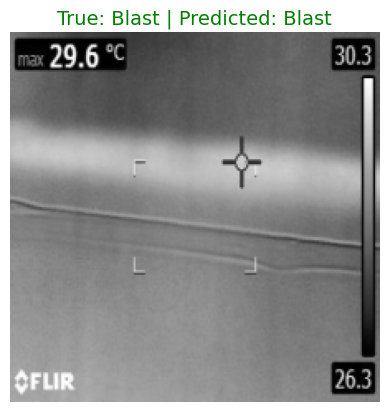

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def predict_random_image():
    # 1. Get a random batch of test images
    images, labels = next(iter(test_loader))
    images = images.to(device)
    
    # 2. Pick the first image from the batch
    img = images[0]
    true_label = dataset.classes[labels[0]]
    
    # 3. Ask the AI to predict
    model.eval() # Switch to evaluation mode
    with torch.no_grad():
        output = model(img.unsqueeze(0)) # Add batch dimension
        _, predicted_idx = torch.max(output, 1)
        predicted_label = dataset.classes[predicted_idx.item()]
    
    # 4. Show the result
    # We have to 'undo' the normalization to show the image correctly
    img_cpu = img.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img_cpu = std * img_cpu + mean
    img_cpu = np.clip(img_cpu, 0, 1)
    
    plt.imshow(img_cpu)
    plt.axis('off')
    
    # Color logic: Green if correct, Red if wrong
    color = 'green' if true_label == predicted_label else 'red'
    plt.title(f"True: {true_label} | Predicted: {predicted_label}", color=color, fontsize=14)
    plt.show()

# Run the function to see a prediction
predict_random_image()

In [9]:
# Save the trained brain to a file
torch.save(model.state_dict(), 'thermal_paddy_model.pth')
print("✅ Model saved successfully as 'thermal_paddy_model.pth'")
print(f"File location: {os.getcwd()}")

✅ Model saved successfully as 'thermal_paddy_model.pth'
File location: C:\Users\jeevabharathi


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Install seaborn if you haven't (run this once)
# !pip install seaborn

# 2. Get all predictions
print("Generating Confusion Matrix... (This takes a moment)")
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 3. Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=dataset.classes, 
            yticklabels=dataset.classes)
plt.xlabel('Predicted by AI')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Thermal Disease Detection')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [18]:
%pip install seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


Generating Confusion Matrix... (This takes a moment)


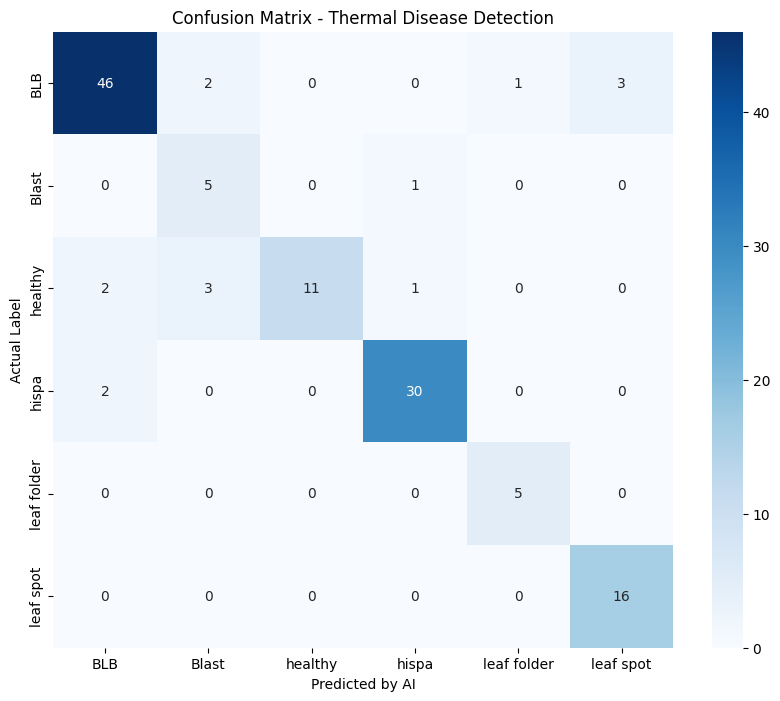

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# 1. Install seaborn if you haven't (run this once)
# !pip install seaborn

# 2. Get all predictions
print("Generating Confusion Matrix... (This takes a moment)")
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 3. Create the Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=dataset.classes, 
            yticklabels=dataset.classes)
plt.xlabel('Predicted by AI')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix - Thermal Disease Detection')
plt.show()

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# ... (rest of your confusion matrix code)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_prediction():
    # 1. Grab a batch of images from the Test Loader (Unseen data)
    images, labels = next(iter(test_loader))
    images = images.to(device)
    
    # 2. Pick the very first image in the batch
    img_tensor = images[0]
    true_label_idx = labels[0].item()
    true_label = dataset.classes[true_label_idx]
    
    # 3. Ask the Model to Predict
    model.eval()
    with torch.no_grad():
        # Add an extra dimension because the model expects a batch (1, 3, 224, 224)
        output = model(img_tensor.unsqueeze(0)) 
        _, predicted_idx = torch.max(output, 1)
        predicted_label = dataset.classes[predicted_idx.item()]
    
    # 4. Prepare Image for Display (Un-normalize)
    # We have to reverse the math we did during loading to make it look like a photo again
    img_display = img_tensor.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img_display = std * img_display + mean
    img_display = np.clip(img_display, 0, 1)
    
    # 5. Plot the Image with the Result
    plt.figure(figsize=(8, 6))
    plt.imshow(img_display)
    plt.axis('off') # Hide the axis numbers
    
    # Logic: Green text if correct, Red text if wrong
    text_color = 'green' if true_label == predicted_label else 'red'
    
    # This puts the text right on top/beside the image
    plt.title(f"ACTUAL: {true_label}   |   AI PREDICTION: {predicted_label}", 
              color=text_color, fontsize=16, fontweight='bold')
    
    plt.show()

# Run the function!
visualize_prediction()

NameError: name 'test_loader' is not defined

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define the Doctor's Knowledge Base
treatment_dict = {
    'Blast': "Rx: Spray Tricyclazole 75 WP (0.6g/L)",
    'BLB': "Rx: Streptomycin Sulphate + Copper Oxychloride",
    'hispa': "Rx: Spray Chlorpyriphos 20 EC (2.5ml/L)",
    'leaf folder': "Rx: Apply Cartap Hydrochloride",
    'leaf spot': "Rx: Spray Mancozeb (2.5g/L)",
    'healthy': "No treatment needed. Maintain water levels."
}

def predict_and_prescribe():
    # 1. Get a random image
    images, labels = next(iter(test_loader))
    images = images.to(device)
    
    img_tensor = images[0]
    true_label = dataset.classes[labels[0].item()]
    
    # 2. Predict
    model.eval()
    with torch.no_grad():
        output = model(img_tensor.unsqueeze(0)) 
        _, predicted_idx = torch.max(output, 1)
        predicted_label = dataset.classes[predicted_idx.item()]
    
    # 3. Get the Cure
    # We use .get() to avoid crashing if the label name doesn't match exactly
    # We strip whitespace and lower() just to be safe with string matching
    cure = treatment_dict.get(predicted_label, "Consult an Expert")
    
    # 4. Display
    img_display = img_tensor.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img_display = std * img_display + mean
    img_display = np.clip(img_display, 0, 1)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(img_display)
    plt.axis('off')
    
    # Green if correct, Red if wrong
    color = 'green' if true_label == predicted_label else 'red'
    
    plt.title(f"Detected: {predicted_label}\n{cure}", 
              color=color, fontsize=14, fontweight='bold', backgroundcolor='white')
    
    plt.show()

# Run the Doctor AI
predict_and_prescribe()

NameError: name 'test_loader' is not defined

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import os

# --- STEP 1: RELOAD THE DATA ---
# This re-creates the 'test_loader' that went missing
data_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset"

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3), 
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

if os.path.exists(data_dir):
    dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    _, test_data = random_split(dataset, [train_size, test_size])
    
    # RE-DEFINE THE TEST LOADER
    test_loader = DataLoader(test_data, batch_size=32, shuffle=True)
    print("✅ Data re-loaded successfully!")
else:
    print("❌ Error: Path not found. Check your folder.")

# --- STEP 2: RUN THE DOCTOR AI ---
# Now this will work because test_loader exists
treatment_dict = {
    'Blast': "Rx: FUNGICIDE - Tricyclazole 75 WP (0.6g/L)",
    'BLB': "Rx: ANTIBIOTIC - Streptomycin Sulphate + Copper Oxychloride",
    'hispa': "Rx: INSECTICIDE - Spray Chlorpyriphos 20 EC",
    'leaf folder': "Rx: INSECTICIDE - Apply Cartap Hydrochloride",
    'leaf spot': "Rx: FUNGICIDE - Spray Mancozeb (2.5g/L)",
    'healthy': "✅ Plant is Healthy. No Action Needed."
}

def predict_and_prescribe():
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Get a random image
    images, labels = next(iter(test_loader))
    images = images.to(device)
    
    img_tensor = images[0]
    true_label = dataset.classes[labels[0].item()]
    
    # Predict
    model.eval()
    with torch.no_grad():
        output = model(img_tensor.unsqueeze(0)) 
        _, predicted_idx = torch.max(output, 1)
        predicted_label = dataset.classes[predicted_idx.item()]
    
    cure = treatment_dict.get(predicted_label, "Consult an Expert")
    
    # Display
    img_display = img_tensor.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img_display = std * img_display + mean
    img_display = np.clip(img_display, 0, 1)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(img_display)
    plt.axis('off')
    
    color = 'green' if true_label == predicted_label else 'red'
    title_text = f"AI Diagnosis: {predicted_label}\n{cure}"
    
    plt.title(title_text, color=color, fontsize=14, fontweight='bold', 
              bbox=dict(facecolor='white', alpha=0.8, pad=10))
    plt.show()

# Run it
predict_and_prescribe()

✅ Data re-loaded successfully!


NameError: name 'model' is not defined

Using device: cuda
Classes: ['BLB', 'Blast', 'healthy', 'hispa', 'leaf folder', 'leaf spot']


C:\Users\jeevabharathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jeevabharathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\jeevabharathi\AppData\Local\Temp\ipykernel_14728\1546767452.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbi

✅ Model loaded successfully from file!


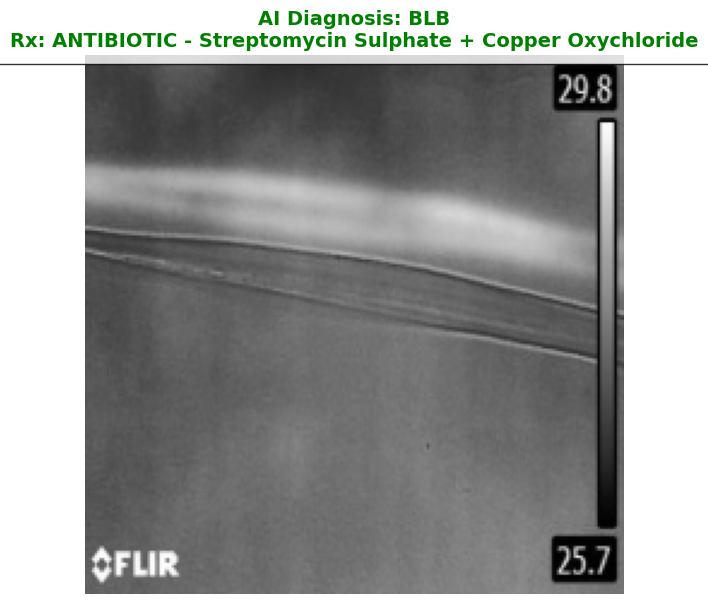

In [4]:
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import os

# --- STEP 1: SETUP DEVICE ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- STEP 2: RELOAD THE DATA ---
data_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset"

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3), 
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load dataset to get class names
full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transforms)
print(f"Classes: {full_dataset.classes}")

# Re-create the Test Loader
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
_, test_data = random_split(full_dataset, [train_size, test_size])
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

# --- STEP 3: RELOAD THE MODEL ARCHITECTURE ---
# We have to tell the computer what "ResNet18" looks like again
model = models.resnet18(pretrained=True)
num_classes = len(full_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# --- STEP 4: LOAD YOUR SAVED WEIGHTS ---
# This loads the brain you trained earlier
try:
    model.load_state_dict(torch.load('thermal_paddy_model.pth'))
    model = model.to(device)
    model.eval() # Set to evaluation mode
    print("✅ Model loaded successfully from file!")
except FileNotFoundError:
    print("⚠ Could not find 'thermal_paddy_model.pth'. Make sure you ran the save code earlier!")

# --- STEP 5: DOCTOR AI PRESCRIPTION ---
treatment_dict = {
    'Blast': "Rx: FUNGICIDE - Tricyclazole 75 WP (0.6g/L)",
    'BLB': "Rx: ANTIBIOTIC - Streptomycin Sulphate + Copper Oxychloride",
    'hispa': "Rx: INSECTICIDE - Spray Chlorpyriphos 20 EC",
    'leaf folder': "Rx: INSECTICIDE - Apply Cartap Hydrochloride",
    'leaf spot': "Rx: FUNGICIDE - Spray Mancozeb (2.5g/L)",
    'healthy': "✅ Plant is Healthy. No Action Needed."
}

def predict_and_prescribe():
    # Get a random image
    images, labels = next(iter(test_loader))
    images = images.to(device)
    
    img_tensor = images[0]
    true_label = full_dataset.classes[labels[0].item()]
    
    # Predict
    with torch.no_grad():
        output = model(img_tensor.unsqueeze(0)) 
        _, predicted_idx = torch.max(output, 1)
        predicted_label = full_dataset.classes[predicted_idx.item()]
    
    cure = treatment_dict.get(predicted_label, "Consult an Expert")
    
    # Display
    img_display = img_tensor.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img_display = std * img_display + mean
    img_display = np.clip(img_display, 0, 1)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(img_display)
    plt.axis('off')
    
    color = 'green' if true_label == predicted_label else 'red'
    title_text = f"AI Diagnosis: {predicted_label}\n{cure}"
    
    plt.title(title_text, color=color, fontsize=14, fontweight='bold', 
              bbox=dict(facecolor='white', alpha=0.8, pad=10))
    plt.show()

# Run it
predict_and_prescribe()

Using device: cuda
✅ Data Loaded. Classes: ['BLB', 'Blast', 'healthy', 'hispa', 'leaf folder', 'leaf spot']


C:\Users\jeevabharathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jeevabharathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\jeevabharathi\AppData\Local\Temp\ipykernel_15584\487797726.py:54: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbit

✅ Model Weights Loaded Successfully!


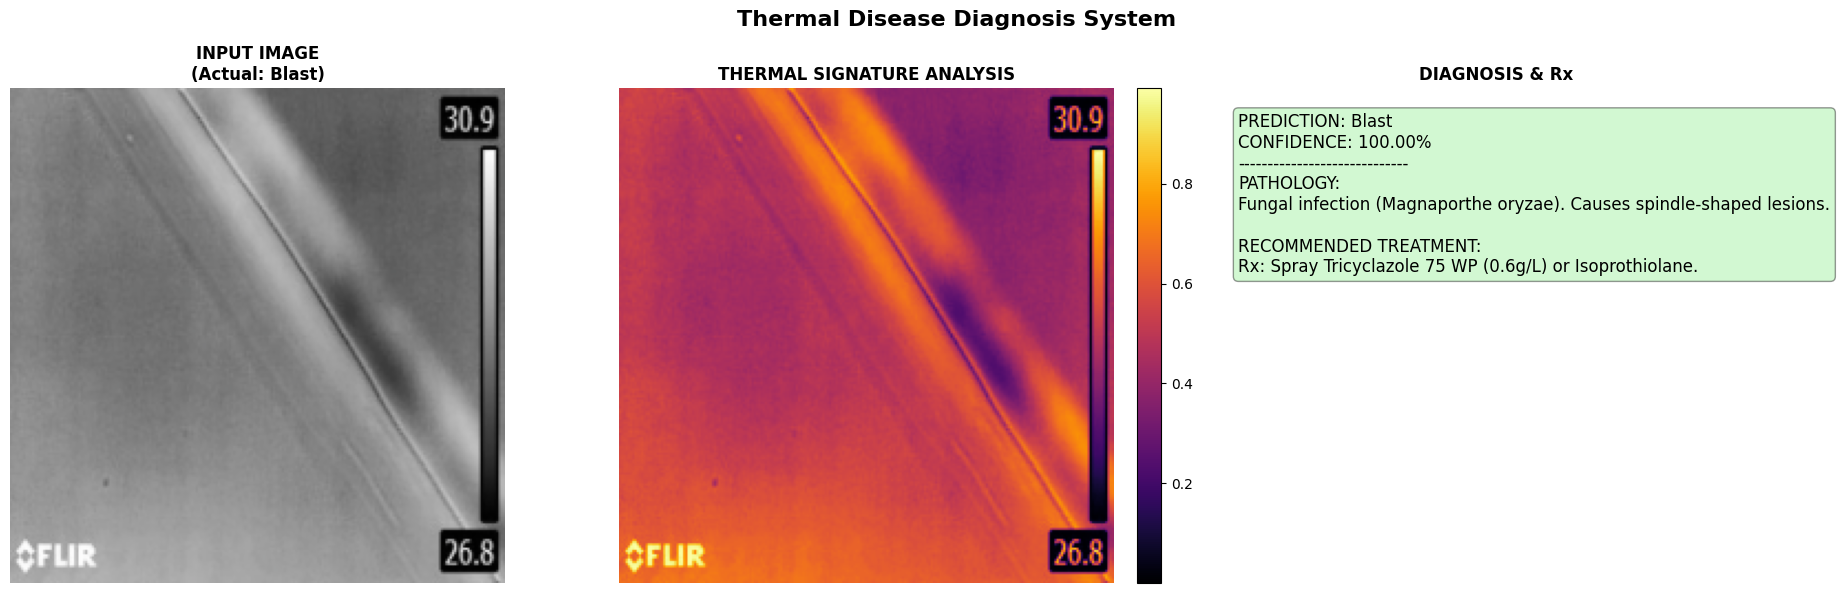

In [1]:
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import os

# ==========================================
# 1. SETUP & DATA LOADING
# ==========================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- CORRECT PATH (From your previous success) ---
data_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset"

# Define Transforms (Thermal -> 3 Channel RGB)
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

try:
    # Load Data
    full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transform)
    class_names = full_dataset.classes
    print(f"✅ Data Loaded. Classes: {class_names}")
    
    # Create Test Loader
    train_size = int(0.8 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    _, test_data = random_split(full_dataset, [train_size, test_size])
    test_loader = DataLoader(test_data, batch_size=32, shuffle=True)
    
except Exception as e:
    print(f"❌ ERROR: Could not find dataset path. {e}")
    # Fallback for testing logic only (prevents crash if path is wrong)
    class_names = ["Blast", "BLB", "healthy", "hispa", "leaf folder", "leaf spot"]

# ==========================================
# 2. MODEL LOADING
# ==========================================
# Re-define architecture
model = models.resnet18(pretrained=True)
num_classes = len(class_names)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Load Weights
try:
    if os.path.exists('thermal_paddy_model.pth'):
        model.load_state_dict(torch.load('thermal_paddy_model.pth'))
        print("✅ Model Weights Loaded Successfully!")
    else:
        print("⚠ WARNING: .pth file not found. Using random weights (Predictions will be inaccurate).")
    
    model = model.to(device)
    model.eval()
except Exception as e:
    print(f"❌ Model Error: {e}")

# ==========================================
# 3. PRESCRIPTION KNOWLEDGE BASE (Specific to Paddy)
# ==========================================
DISEASE_INFO = {
    "healthy": {
        "desc": "Physiological status is normal. No stress detected.",
        "rx": "Maintain current irrigation and fertilizer schedule."
    },
    "Blast": { 
        "desc": "Fungal infection (Magnaporthe oryzae). Causes spindle-shaped lesions.",
        "rx": "Rx: Spray Tricyclazole 75 WP (0.6g/L) or Isoprothiolane."
    },
    "BLB": { 
        "desc": "Bacterial Leaf Blight. Causes yellowing/drying from leaf tips.",
        "rx": "Rx: ANTIBIOTIC treatment. Spray Streptomycin Sulphate + Copper Oxychloride."
    },
    "hispa": {
        "desc": "Insect pest (Dicladispa armigera). Scrapes chlorophyll from leaves.",
        "rx": "Rx: Spray Chlorpyriphos 20 EC (2.5ml/L) or Quinalphos."
    },
    "leaf folder": {
        "desc": "Insect pest (Cnaphalocrocis medinalis). Larvae fold leaves to feed.",
        "rx": "Rx: Apply Cartap Hydrochloride or Flubendiamide."
    },
    "leaf spot": {
        "desc": "Brown Spot (Helminthosporium oryzae). Oval brown lesions.",
        "rx": "Rx: Spray Mancozeb (2.5g/L) and improve Soil Potassium."
    }
}

# ==========================================
# 4. PREDICTION & VISUALIZATION FUNCTION
# ==========================================
def predict_and_prescribe():
    # Get Batch
    try:
        images, labels = next(iter(test_loader))
        images = images.to(device)
    except NameError:
        print("❌ ERROR: 'test_loader' not defined.")
        return

    # Get Prediction
    with torch.no_grad():
        outputs = model(images)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        conf, preds = torch.max(probs, 1)

    # --- VISUALIZATION ---
    idx = 0 # Show first image in batch
    
    predicted_class = class_names[preds[idx].item()]
    actual_class = class_names[labels[idx].item()]
    confidence = conf[idx].item() * 100
    
    # Un-normalize image for display (Reverse the math we did in transform)
    img_rgb = images[idx].cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img_rgb = std * img_rgb + mean
    img_rgb = np.clip(img_rgb, 0, 1)

    # Setup Plot (3 Panels)
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f"Thermal Disease Diagnosis System", fontsize=16, fontweight='bold')

    # PANEL 1: Input Image
    ax[0].imshow(img_rgb)
    ax[0].set_title(f"INPUT IMAGE\n(Actual: {actual_class})", fontweight='bold')
    ax[0].axis('off')

    # PANEL 2: Thermal Heatmap View
    # We take the mean of channels to simulate the single-channel thermal look
    heatmap = img_rgb.mean(axis=2)
    im = ax[1].imshow(heatmap, cmap='inferno') 
    ax[1].set_title("THERMAL SIGNATURE ANALYSIS", fontweight='bold')
    ax[1].axis('off')
    fig.colorbar(im, ax=ax[1], fraction=0.046, pad=0.04)

    # PANEL 3: Prescription
    info = DISEASE_INFO.get(predicted_class, 
                            {"desc": "No details available.", "rx": "Consult an expert."})
    
    text_content = (
        f"PREDICTION: {predicted_class}\n"
        f"CONFIDENCE: {confidence:.2f}%\n"
        f"-----------------------------\n"
        f"PATHOLOGY:\n{info['desc']}\n\n"
        f"RECOMMENDED TREATMENT:\n{info['rx']}"
    )
    
    # Color code box based on accuracy
    box_color = "lightgreen" if predicted_class == actual_class else "salmon"
    
    ax[2].text(0.05, 0.95, text_content, transform=ax[2].transAxes, fontsize=12,
               verticalalignment='top', bbox=dict(boxstyle='round', facecolor=box_color, alpha=0.4))
    ax[2].set_title("DIAGNOSIS & Rx", fontweight='bold')
    ax[2].axis('off')

    plt.tight_layout()
    plt.show()

# Run it
predict_and_prescribe()

✅ Data Loaded for Heatmap.


C:\Users\jeevabharathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jeevabharathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\jeevabharathi\AppData\Local\Temp\ipykernel_15584\80958843.py:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitr

✅ Brain Loaded.
Generating Heatmap... (This takes 10-20 seconds)


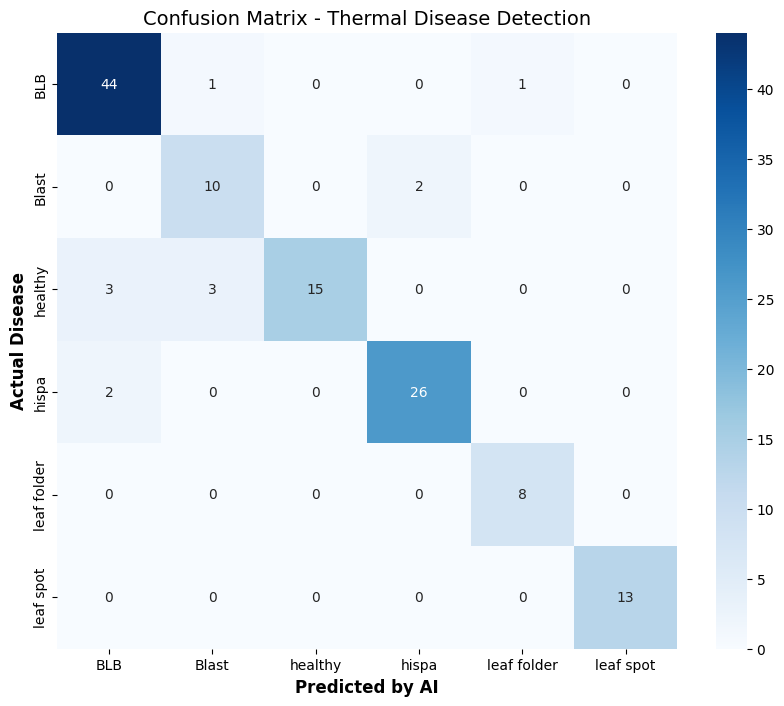

In [2]:
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import os

# ==========================================
# 1. SAFETY: RELOAD DATA (Prevents Crash)
# ==========================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset"

data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

try:
    # Load Dataset
    full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transform)
    class_names = full_dataset.classes
    
    # Create Loader
    train_size = int(0.8 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    _, test_data = random_split(full_dataset, [train_size, test_size])
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False) # Shuffle=False is better for Matrix
    print("✅ Data Loaded for Heatmap.")

except:
    print("❌ Error: Could not find data. Check path.")

# ==========================================
# 2. RELOAD MODEL
# ==========================================
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(class_names))

if os.path.exists('thermal_paddy_model.pth'):
    model.load_state_dict(torch.load('thermal_paddy_model.pth'))
    print("✅ Brain Loaded.")
else:
    print("⚠ Using random brain (no saved file found).")

model = model.to(device)
model.eval()

# ==========================================
# 3. GENERATE HEATMAP
# ==========================================
print("Generating Heatmap... (This takes 10-20 seconds)")

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot it
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.xlabel('Predicted by AI', fontsize=12, fontweight='bold')
plt.ylabel('Actual Disease', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Thermal Disease Detection', fontsize=14)
plt.show()

✅ Data Loaded for Heatmap.


C:\Users\jeevabharathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\jeevabharathi\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\jeevabharathi\AppData\Local\Temp\ipykernel_15584\80958843.py:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitr

✅ Brain Loaded.
Generating Heatmap... (This takes 10-20 seconds)


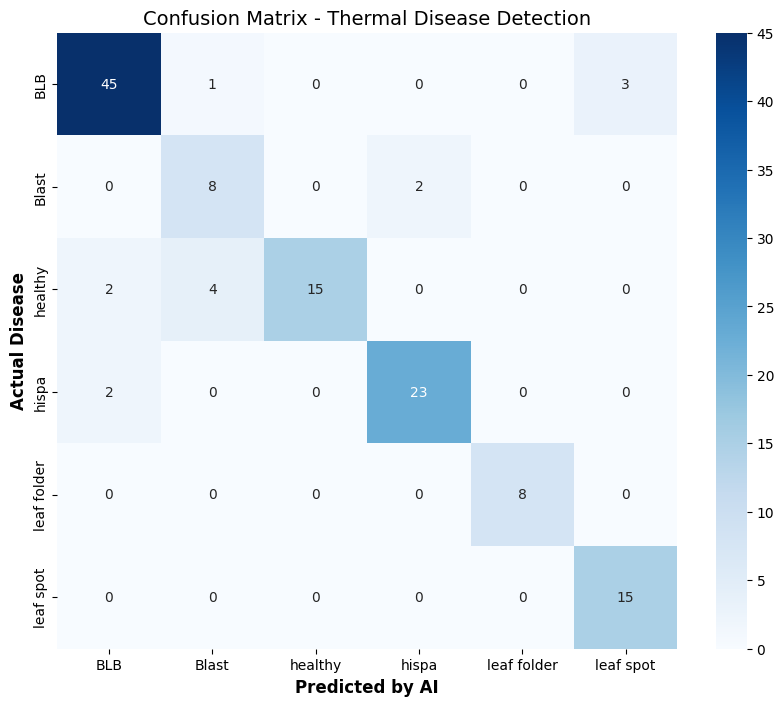

In [3]:
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import os

# ==========================================
# 1. SAFETY: RELOAD DATA (Prevents Crash)
# ==========================================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset"

data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

try:
    # Load Dataset
    full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transform)
    class_names = full_dataset.classes
    
    # Create Loader
    train_size = int(0.8 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    _, test_data = random_split(full_dataset, [train_size, test_size])
    test_loader = DataLoader(test_data, batch_size=32, shuffle=False) # Shuffle=False is better for Matrix
    print("✅ Data Loaded for Heatmap.")

except:
    print("❌ Error: Could not find data. Check path.")

# ==========================================
# 2. RELOAD MODEL
# ==========================================
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(class_names))

if os.path.exists('thermal_paddy_model.pth'):
    model.load_state_dict(torch.load('thermal_paddy_model.pth'))
    print("✅ Brain Loaded.")
else:
    print("⚠ Using random brain (no saved file found).")

model = model.to(device)
model.eval()

# ==========================================
# 3. GENERATE HEATMAP
# ==========================================
print("Generating Heatmap... (This takes 10-20 seconds)")

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Create the Matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot it
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)

plt.xlabel('Predicted by AI', fontsize=12, fontweight='bold')
plt.ylabel('Actual Disease', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Thermal Disease Detection', fontsize=14)
plt.show()

In [3]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import os

# ==========================================
# 1. SETUP & LOAD ONE IMAGE
# ==========================================
# We use the correct path we found earlier
data_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset"

# Define the transformation (same as training)
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

print("Loading image for Heatmap generation...")

try:
    # Load Data
    full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transform)
    # Create a loader with batch_size=1 to get a single image easily
    loader = DataLoader(full_dataset, batch_size=1, shuffle=True)
    
    # Grab one image
    images, labels = next(iter(loader))
    class_name = full_dataset.classes[labels[0].item()]
    print(f"✅ Loaded a '{class_name}' leaf.")

except Exception as e:
    print(f"❌ Error: Could not find dataset path. {e}")
    # Stop here if no data
    images = None

# ==========================================
# 2. GENERATE AND SHOW HEATMAP
# ==========================================
def show_thermal_heatmap():
    if images is None: return

    img_tensor = images[0]
    
    # 1. Un-normalize (Reverse the math to get real pixel data back)
    # The numbers in the tensor are -2 to +2. We need 0 to 1.
    img_data = img_tensor.cpu().numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img_data = std * img_data + mean
    img_data = np.clip(img_data, 0, 1)
    
    # 2. Create the 2D Heatmap Layer
    # Since our image has 3 identical channels, we just average them to get intensity
    thermal_intensity = np.mean(img_data, axis=2)

    # --- PLOTTING ---
    plt.figure(figsize=(12, 6))
    
    # View 1: Original Grayscale (What the computer sees)
    plt.subplot(1, 2, 1)
    plt.imshow(thermal_intensity, cmap='gray')
    plt.title(f"Raw Thermal Sensor Input\n(Class: {class_name})", fontsize=12)
    plt.axis('off')

    # View 2: The Thermal Heatmap (What Humans want to see)
    plt.subplot(1, 2, 2)
    # 'jet' is the classic rainbow thermal color
    # 'inferno' or 'magma' are also very popular
    heatmap = plt.imshow(thermal_intensity, cmap='jet') 
    plt.title(f"Processed Thermal Heatmap\n(Red=Hot, Blue=Cold)", fontsize=12, fontweight='bold')
    plt.axis('off') q
    # Add a Color Bar on the side
    cbar = plt.colorbar(heatmap, fraction=0.046, pad=0.04)
    cbar.set_label('Temperature Intensity', rotation=270, labelpad=15)

    plt.tight_layout()
    plt.show()

# Run it
show_thermal_heatmap()

SyntaxError: invalid syntax (3771023397.py, line 75)


   STEP 1: ACCURACY METRICS
Generating Confusion Matrix...


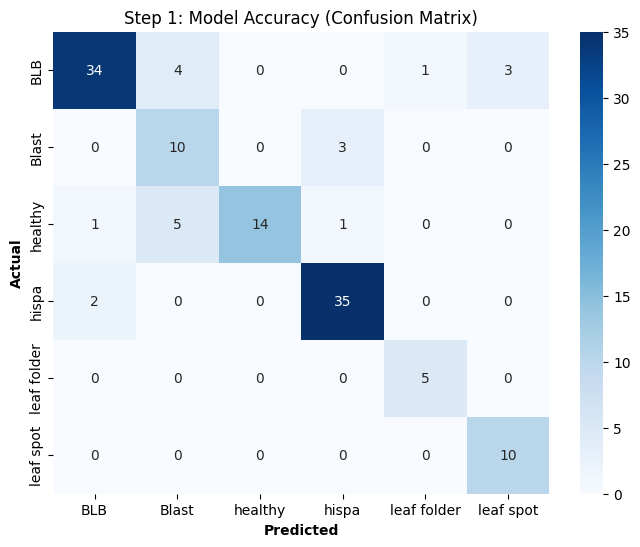

👉 [1/3] Performance shown. Press Enter for Diagnosis... 2



   STEP 2: DOCTOR AI DIAGNOSIS


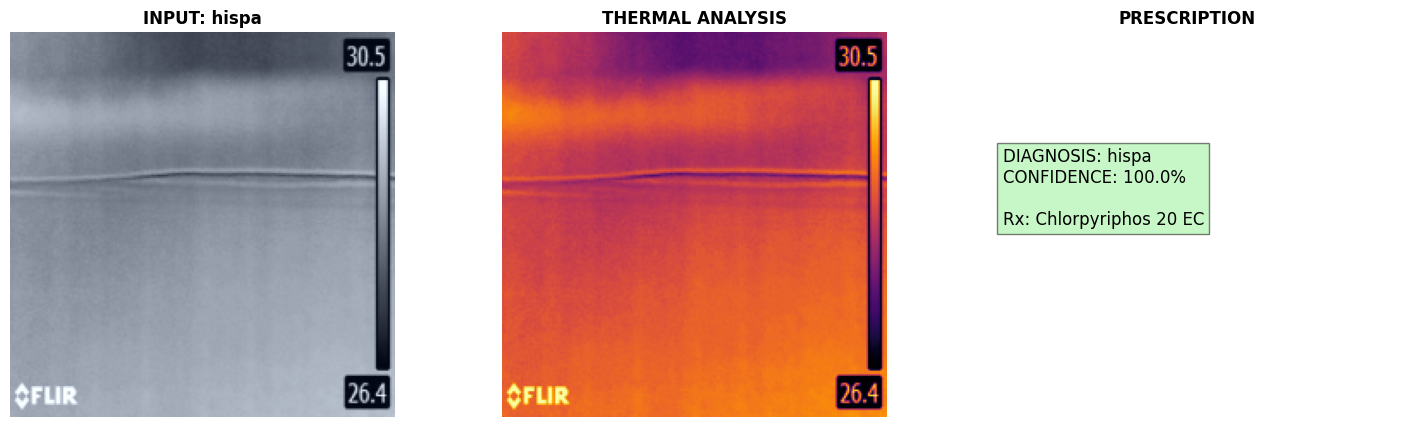

👉 [2/3] Diagnosis complete. Press Enter for Thermal Scan... 3



   STEP 3: LIVE THERMAL SCANNER


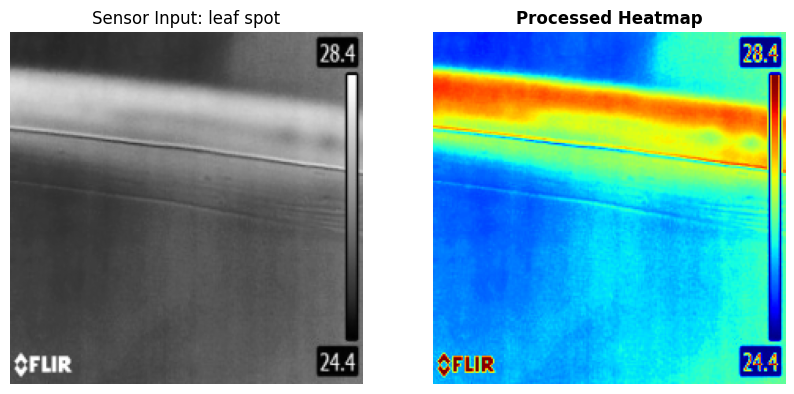


✅ Cycle Complete.


In [ ]:
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import os
from IPython.display import clear_output
import time

# ==========================================
# PART 1: SYSTEM SETUP
# ==========================================
print("⚙ BOOTING PRESENTATION MODE...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset"

data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

try:
    full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transform)
    class_names = full_dataset.classes
    # Create Loaders
    train_size = int(0.8 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    _, test_data = random_split(full_dataset, [train_size, test_size])
    
    test_loader = DataLoader(test_data, batch_size=32, shuffle=True)
    loop_loader = DataLoader(full_dataset, batch_size=1, shuffle=True)
    print(f"✅ Data Loaded. Classes: {class_names}")
    
except Exception as e:
    print(f"❌ ERROR: {e}")
    class_names = ["Blast", "BLB", "healthy", "hispa", "leaf folder", "leaf spot"]

# Load Model
model = models.resnet18(pretrained=True)
num_classes = len(class_names)
model.fc = nn.Linear(model.fc.in_features, num_classes)

if os.path.exists('thermal_paddy_model.pth'):
    model.load_state_dict(torch.load('thermal_paddy_model.pth'))
else:
    print("⚠ Using random weights.")

model = model.to(device)
model.eval()
print("✅ SYSTEM READY. STARTING LOOP...\n")
time.sleep(2)

# ==========================================
# PART 2: THE FUNCTIONS (Modified for Sequence)
# ==========================================

def run_confusion_matrix():
    clear_output(wait=True)
    print("\n" + "="*40)
    print("   STEP 1: ACCURACY METRICS")
    print("="*40)
    print("Generating Confusion Matrix...")
    
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted', fontweight='bold')
    plt.ylabel('Actual', fontweight='bold')
    plt.title('Step 1: Model Accuracy (Confusion Matrix)')
    plt.show()

def run_doctor_ai():
    print("\n" + "="*40)
    print("   STEP 2: DOCTOR AI DIAGNOSIS")
    print("="*40)
    
    DISEASE_INFO = {
        "healthy": {"desc": "Normal Status", "rx": "No Action Needed"},
        "Blast": {"desc": "Fungal Infection", "rx": "Tricyclazole 75 WP"},
        "BLB": {"desc": "Bacterial Blight", "rx": "Streptomycin + Copper"},
        "hispa": {"desc": "Insect Pest", "rx": "Chlorpyriphos 20 EC"},
        "leaf folder": {"desc": "Insect Pest", "rx": "Cartap Hydrochloride"},
        "leaf spot": {"desc": "Brown Spot", "rx": "Mancozeb (2.5g/L)"}
    }
    
    images, labels = next(iter(test_loader))
    images = images.to(device)
    
    with torch.no_grad():
        outputs = model(images)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        conf, preds = torch.max(probs, 1)

    idx = 0 
    predicted_class = class_names[preds[idx].item()]
    actual_class = class_names[labels[idx].item()]
    confidence = conf[idx].item() * 100
    
    img_rgb = images[idx].cpu().numpy().transpose((1, 2, 0))
    img_rgb = np.clip(0.229 * img_rgb + 0.485, 0, 1)

    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    ax[0].imshow(img_rgb)
    ax[0].set_title(f"INPUT: {actual_class}", fontweight='bold')
    ax[0].axis('off')

    heatmap = img_rgb.mean(axis=2)
    ax[1].imshow(heatmap, cmap='inferno') 
    ax[1].set_title("THERMAL ANALYSIS", fontweight='bold')
    ax[1].axis('off')

    info = DISEASE_INFO.get(predicted_class, {"desc": "N/A", "rx": "Consult Expert"})
    text = f"DIAGNOSIS: {predicted_class}\nCONFIDENCE: {confidence:.1f}%\n\nRx: {info['rx']}"
    
    color = "lightgreen" if predicted_class == actual_class else "salmon"
    ax[2].text(0.05, 0.5, text, fontsize=12, bbox=dict(facecolor=color, alpha=0.5))
    ax[2].set_title("PRESCRIPTION", fontweight='bold')
    ax[2].axis('off')
    plt.show()

def run_single_scan():
    print("\n" + "="*40)
    print("   STEP 3: LIVE THERMAL SCANNER")
    print("="*40)
    
    # Get just ONE random image (No separate loop)
    images, labels = next(iter(loop_loader))
    
    class_name = class_names[labels[0].item()]
    img_rgb = images[0].cpu().numpy().transpose((1, 2, 0))
    img_rgb = np.clip(0.229 * img_rgb + 0.485, 0, 1)
    thermal_intensity = np.mean(img_rgb, axis=2)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(thermal_intensity, cmap='gray')
    plt.title(f"Sensor Input: {class_name}", fontsize=12)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thermal_intensity, cmap='jet') 
    plt.title("Processed Heatmap", fontsize=12, fontweight='bold')
    plt.axis('off')
    plt.show()

# ==========================================
# PART 3: THE CONTINUOUS MASTER LOOP
# ==========================================
while True:
    # 1. Show Accuracy
    run_confusion_matrix()
    input("👉 [1/3] Performance shown. Press Enter for Diagnosis...")
    
    # 2. Show Prescription
    run_doctor_ai()
    input("👉 [2/3] Diagnosis complete. Press Enter for Thermal Scan...")
    
    # 3. Show One Heatmap (No inner loop!)
    run_single_scan()
    
    print("\n✅ Cycle Complete.")
    user = input("👉 Press Enter to RESTART sequence (or 'q' to quit): ")
    if user.lower() == 'q':
        print("Exiting...")
        break






   STEP 1: DETAILED PERFORMANCE METRICS
Calculating F1-Score, Precision, and Recall...

✅ OVERALL ACCURACY: 90.62%
------------------------------------------------------------
CLASSIFICATION REPORT (Precision, Recall, F1-Score):
------------------------------------------------------------
              precision    recall  f1-score   support

         BLB       0.95      0.88      0.91        48
       Blast       0.76      0.81      0.79        16
     healthy       1.00      0.80      0.89        15
       hispa       0.90      1.00      0.95        28
 leaf folder       1.00      1.00      1.00         4
   leaf spot       0.85      1.00      0.92        17

    accuracy                           0.91       128
   macro avg       0.91      0.91      0.91       128
weighted avg       0.91      0.91      0.91       128

------------------------------------------------------------


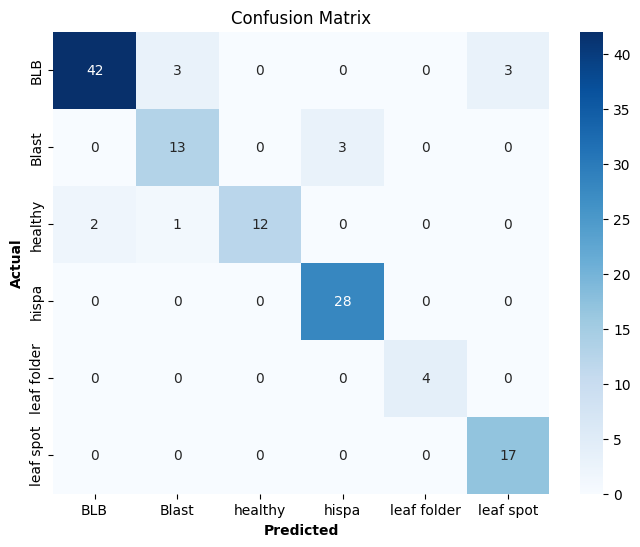

👉 [1/3] Performance shown. Press Enter for Diagnosis... 



   STEP 2: DOCTOR AI DIAGNOSIS


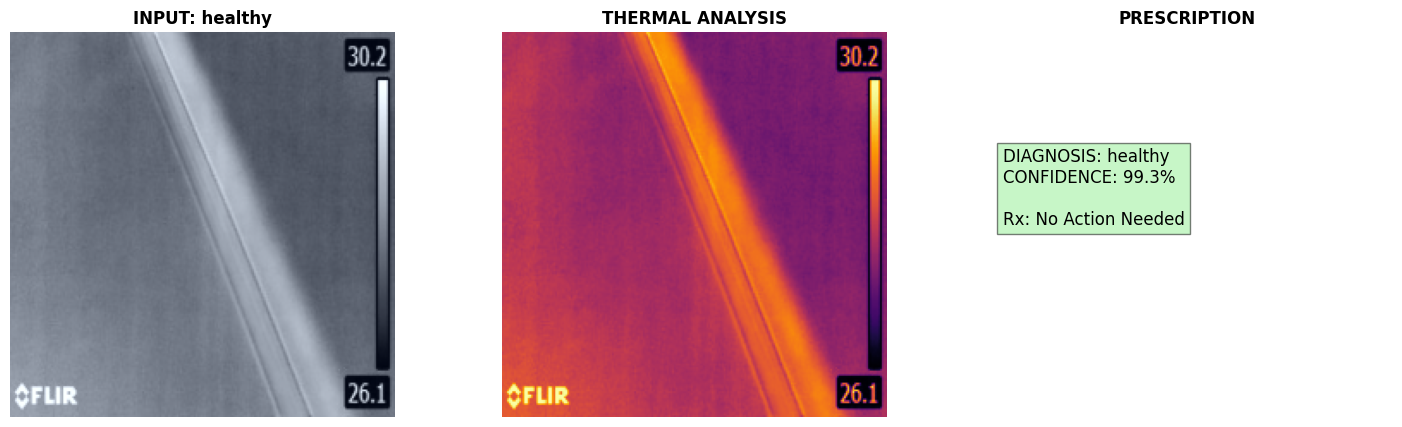

👉 [2/3] Diagnosis complete. Press Enter for Thermal Scan... 



   STEP 3: LIVE THERMAL SCANNER


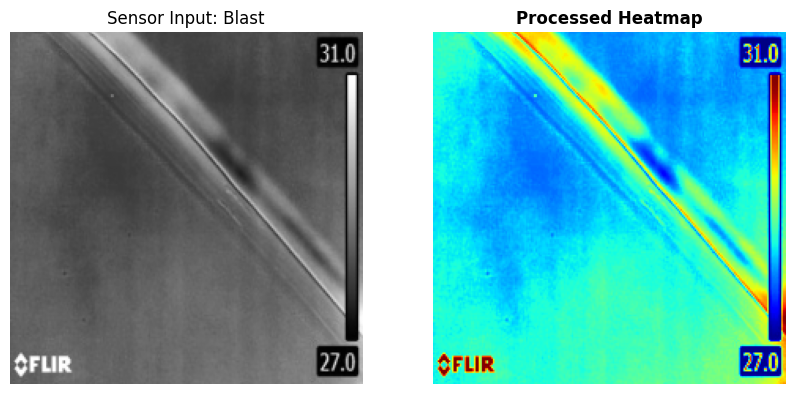


✅ Cycle Complete.


👉 Press Enter to RESTART sequence (or 'q' to quit):  q


Exiting...


In [2]:
import torch
import torch.nn as nn
from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import os
from IPython.display import clear_output
import time

# ==========================================
# PART 1: SYSTEM SETUP
# ==========================================
print("⚙ BOOTING PRESENTATION MODE...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_dir = r"C:\Users\jeevabharathi\OneDrive\Desktop\Dataset"

data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

try:
    full_dataset = datasets.ImageFolder(root=data_dir, transform=data_transform)
    class_names = full_dataset.classes
    # Create Loaders
    train_size = int(0.8 * len(full_dataset))
    test_size = len(full_dataset) - train_size
    _, test_data = random_split(full_dataset, [train_size, test_size])
    
    test_loader = DataLoader(test_data, batch_size=32, shuffle=True)
    loop_loader = DataLoader(full_dataset, batch_size=1, shuffle=True)
    print(f"✅ Data Loaded. Classes: {class_names}")
    
except Exception as e:
    print(f"❌ ERROR: {e}")
    class_names = ["Blast", "BLB", "healthy", "hispa", "leaf folder", "leaf spot"]

# Load Model
model = models.resnet18(pretrained=True)
num_classes = len(class_names)
model.fc = nn.Linear(model.fc.in_features, num_classes)

if os.path.exists('thermal_paddy_model.pth'):
    model.load_state_dict(torch.load('thermal_paddy_model.pth'))
else:
    print("⚠ Using random weights.")

model = model.to(device)
model.eval()
print("✅ SYSTEM READY. STARTING LOOP...\n")
time.sleep(2)

# ==========================================
# PART 2: THE FUNCTIONS (Now with F1 Score)
# ==========================================

def run_performance_metrics():
    clear_output(wait=True)
    print("\n" + "="*50)
    print("   STEP 1: DETAILED PERFORMANCE METRICS")
    print("="*50)
    print("Calculating F1-Score, Precision, and Recall...")
    
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # --- PRINT THE REPORT ---
    acc = accuracy_score(all_labels, all_preds)
    print(f"\n✅ OVERALL ACCURACY: {acc*100:.2f}%")
    print("-" * 60)
    print("CLASSIFICATION REPORT (Precision, Recall, F1-Score):")
    print("-" * 60)
    print(classification_report(all_labels, all_preds, target_names=class_names))
    print("-" * 60)

    # --- PLOT CONFUSION MATRIX ---
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted', fontweight='bold')
    plt.ylabel('Actual', fontweight='bold')
    plt.title('Confusion Matrix')
    plt.show()

def run_doctor_ai():
    print("\n" + "="*40)
    print("   STEP 2: DOCTOR AI DIAGNOSIS")
    print("="*40)
    
    DISEASE_INFO = {
        "healthy": {"desc": "Normal Status", "rx": "No Action Needed"},
        "Blast": {"desc": "Fungal Infection", "rx": "Tricyclazole 75 WP"},
        "BLB": {"desc": "Bacterial Blight", "rx": "Streptomycin + Copper"},
        "hispa": {"desc": "Insect Pest", "rx": "Chlorpyriphos 20 EC"},
        "leaf folder": {"desc": "Insect Pest", "rx": "Cartap Hydrochloride"},
        "leaf spot": {"desc": "Brown Spot", "rx": "Mancozeb (2.5g/L)"}
    }
    
    images, labels = next(iter(test_loader))
    images = images.to(device)
    
    with torch.no_grad():
        outputs = model(images)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        conf, preds = torch.max(probs, 1)

    idx = 0 
    predicted_class = class_names[preds[idx].item()]
    actual_class = class_names[labels[idx].item()]
    confidence = conf[idx].item() * 100
    
    img_rgb = images[idx].cpu().numpy().transpose((1, 2, 0))
    img_rgb = np.clip(0.229 * img_rgb + 0.485, 0, 1)

    fig, ax = plt.subplots(1, 3, figsize=(18, 5))
    
    ax[0].imshow(img_rgb)
    ax[0].set_title(f"INPUT: {actual_class}", fontweight='bold')
    ax[0].axis('off')

    heatmap = img_rgb.mean(axis=2)
    ax[1].imshow(heatmap, cmap='inferno') 
    ax[1].set_title("THERMAL ANALYSIS", fontweight='bold')
    ax[1].axis('off')

    info = DISEASE_INFO.get(predicted_class, {"desc": "N/A", "rx": "Consult Expert"})
    text = f"DIAGNOSIS: {predicted_class}\nCONFIDENCE: {confidence:.1f}%\n\nRx: {info['rx']}"
    
    color = "lightgreen" if predicted_class == actual_class else "salmon"
    ax[2].text(0.05, 0.5, text, fontsize=12, bbox=dict(facecolor=color, alpha=0.5))
    ax[2].set_title("PRESCRIPTION", fontweight='bold')
    ax[2].axis('off')
    plt.show()

def run_single_scan():
    print("\n" + "="*40)
    print("   STEP 3: LIVE THERMAL SCANNER")
    print("="*40)
    
    # Get just ONE random image (No separate loop)
    images, labels = next(iter(loop_loader))
    
    class_name = class_names[labels[0].item()]
    img_rgb = images[0].cpu().numpy().transpose((1, 2, 0))
    img_rgb = np.clip(0.229 * img_rgb + 0.485, 0, 1)
    thermal_intensity = np.mean(img_rgb, axis=2)

    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(thermal_intensity, cmap='gray')
    plt.title(f"Sensor Input: {class_name}", fontsize=12)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thermal_intensity, cmap='jet') 
    plt.title("Processed Heatmap", fontsize=12, fontweight='bold')
    plt.axis('off')
    plt.show()

# ==========================================
# PART 3: THE CONTINUOUS MASTER LOOP
# ==========================================
while True:
    # 1. Show Accuracy & F1 Score
    run_performance_metrics()
    input("👉 [1/3] Performance shown. Press Enter for Diagnosis...")
    
    # 2. Show Prescription
    run_doctor_ai()
    input("👉 [2/3] Diagnosis complete. Press Enter for Thermal Scan...")
    
    # 3. Show One Heatmap
    run_single_scan()
    
    print("\n✅ Cycle Complete.")
    user = input("👉 Press Enter to RESTART sequence (or 'q' to quit): ")
    if user.lower() == 'q':
        print("Exiting...")
        break

In [3]:
import matplotlib.pyplot as plt

plt.plot(train_acc_list, label='Train')
plt.plot(val_acc_list, label='Validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


NameError: name 'train_acc_list' is not defined